Exploratory Data Analysis (EDA) and Hypothesis Testing on Patients with Sepsis - 
included Machine Learning models

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from scipy.stats import ttest_ind, mannwhitneyu


#for imputations and transformations
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for feature selection and modeling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline  # pipeline for imbalanced data
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline  # pipeline for imbalanced data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

#suppressing warnings
import warnings
warnings.filterwarnings('ignore')


In [7]:
#loading data
data = pd.read_csv(r"/Users/abdul-latifmohammed/Desktop/FastAPI/data/Paitients_Files_Train.csv")
data.head(10)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
5,ICU200015,5,116,74,0,0,25.6,0.201,30,1,Negative
6,ICU200016,3,78,50,32,88,31.0,0.248,26,0,Positive
7,ICU200017,10,115,0,0,0,35.3,0.134,29,1,Negative
8,ICU200018,2,197,70,45,543,30.5,0.158,53,1,Positive
9,ICU200019,8,125,96,0,0,0.0,0.232,54,1,Positive


In [8]:
#saving data
Patients_Files_Train=data


In [9]:
#checking data types
data.dtypes

ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          float64
Age            int64
Insurance      int64
Sepssis       object
dtype: object

In [10]:
#checking first 5 rows
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [11]:
#checking the shape of the data
data.shape

(599, 11)

In [12]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [13]:
#checking value counts of data
data.value_counts()

ID         PRG  PL   PR  SK  TS   M11   BD2    Age  Insurance  Sepssis 
ICU200608  1    173  74  0   0    36.8  0.088  38   1          Positive    1
ICU200010  6    148  72  35  0    33.6  0.627  50   0          Positive    1
ICU200011  1    85   66  29  0    26.6  0.351  31   0          Negative    1
ICU200012  8    183  64  0   0    23.3  0.672  32   1          Positive    1
ICU200013  1    89   66  23  94   28.1  0.167  21   1          Negative    1
                                                                          ..
ICU200021  10   168  74  0   0    38.0  0.537  34   0          Positive    1
ICU200020  4    110  92  0   0    37.6  0.191  30   0          Negative    1
ICU200019  8    125  96  0   0    0.0   0.232  54   1          Positive    1
ICU200018  2    197  70  45  543  30.5  0.158  53   1          Positive    1
ICU200017  10   115  0   0   0    35.3  0.134  29   1          Negative    1
Name: count, Length: 599, dtype: int64

In [14]:
#statistical analysis
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Findings:
The dataset contains a mix of continuous variables with varying levels of spread (e.g., PR, TS) and concentration (e.g., PRG, BD2, Age).
Insurance is heavily skewed towards individuals having insurance, as reflected by the high mean.
Variables like TS show extreme variability, likely representing extreme cases or outliers, requiring further investigation.
Age is concentrated in the younger age range, indicating that the sample predominantly consists of younger individuals.

In [15]:
#missing values
data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

Insight: There are no missing values.

In [16]:
# checking for duplicates
data.duplicated().sum()

np.int64(0)

In [17]:
#checking normality of variables
variables=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance']
for i in variables:
    print(stats.shapiro(data[i]))

ShapiroResult(statistic=np.float64(0.9062037473471818), pvalue=np.float64(9.819521166267112e-19))
ShapiroResult(statistic=np.float64(0.9690176430421951), pvalue=np.float64(6.194950107584044e-10))
ShapiroResult(statistic=np.float64(0.8111791883017713), pvalue=np.float64(6.963608377025124e-26))
ShapiroResult(statistic=np.float64(0.9067072453535661), pvalue=np.float64(1.1023048176917609e-18))
ShapiroResult(statistic=np.float64(0.7120630517094823), pvalue=np.float64(8.57982292777057e-31))
ShapiroResult(statistic=np.float64(0.9497941765826862), pvalue=np.float64(2.1647536172798366e-13))
ShapiroResult(statistic=np.float64(0.8327280700621253), pvalue=np.float64(1.4775076617013284e-24))
ShapiroResult(statistic=np.float64(0.8728037820889493), pvalue=np.float64(1.0752146783936355e-21))
ShapiroResult(statistic=np.float64(0.5840759550788469), pvalue=np.float64(1.9361413736720113e-35))


### Findings: 
All the variables in this dataset fail the Shapiro-Wilk test for normality, meaning none of them follow a normal distribution. This suggests that statistical methods that assume normality (such as parametric tests) may not be appropriate for these variables, and non-parametric methods or transformations might be necessary.

In [18]:
list(data.columns)

['ID',
 'PRG',
 'PL',
 'PR',
 'SK',
 'TS',
 'M11',
 'BD2',
 'Age',
 'Insurance',
 'Sepssis']

In [19]:
#listing all numerical variables
numerical=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance']

#listing all categorical variables
categorical=['Sepssis']


In [20]:
#dropping ID column
data=data.drop('ID',axis=1)
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [21]:
#checking for class distribution of target variable
data['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

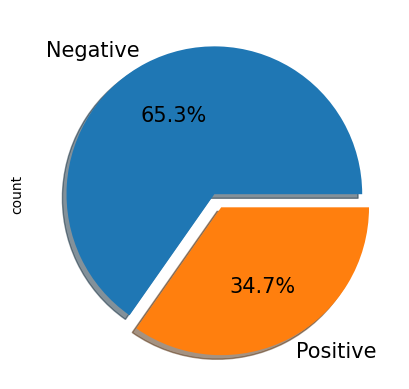

In [22]:
#Graphical analysis
data['Sepssis'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=15, explode=[0,0.1],shadow=True)
plt.show()

### Findings:
The pie chart above shows that 65.3% of patients have positive sepsis (1), 34.7% have negative sepsis (0).

# Univariate Analysis

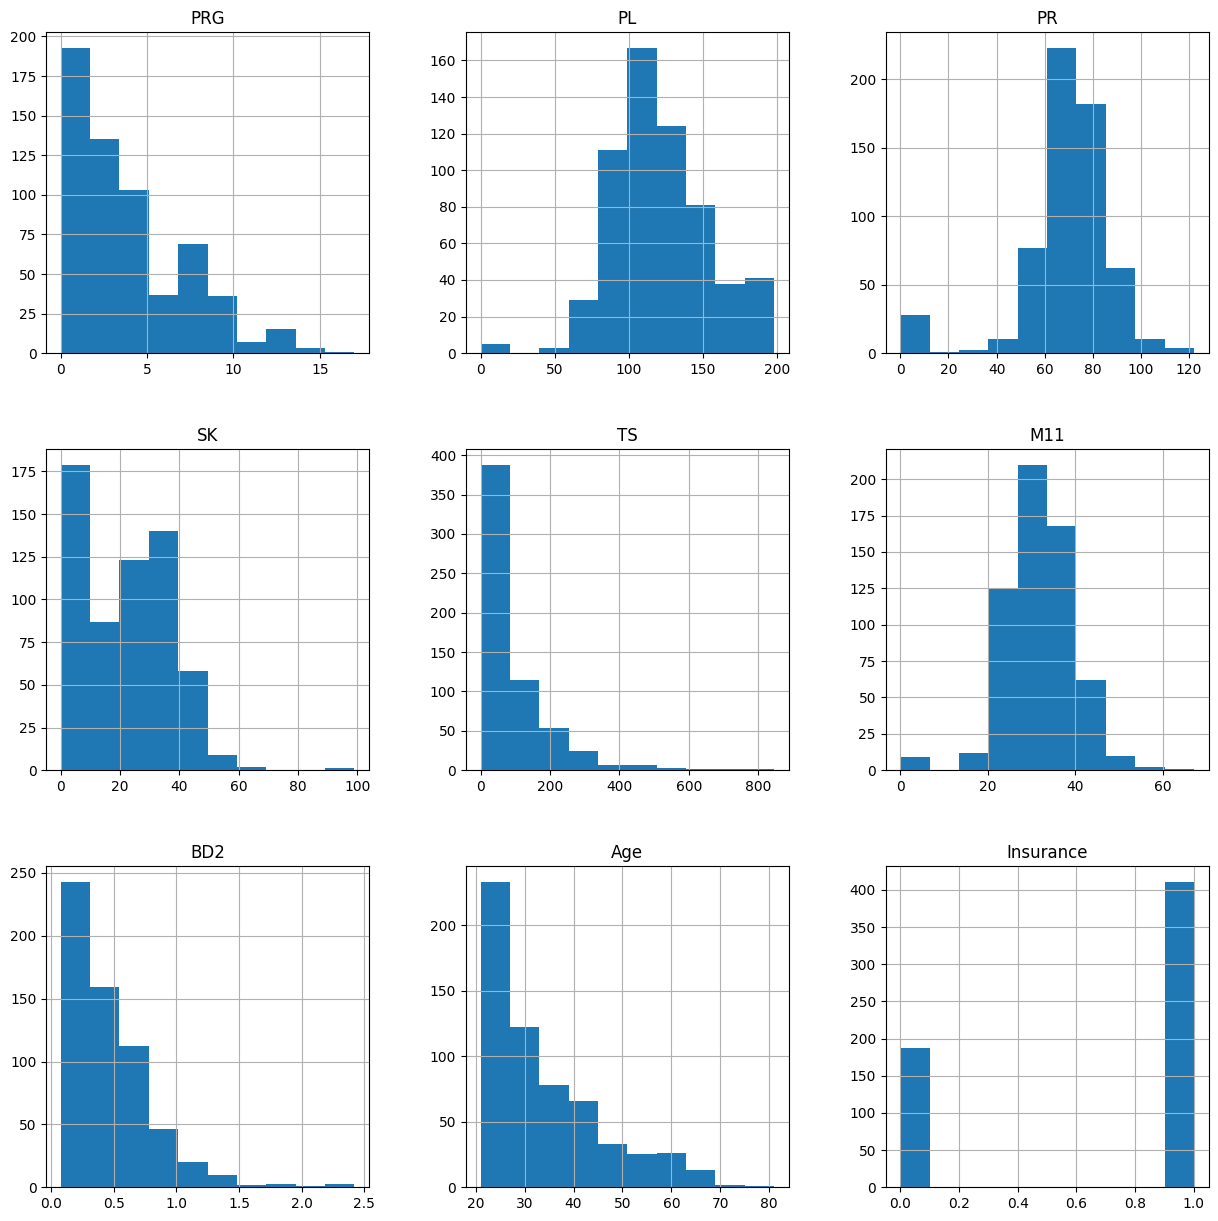

In [23]:
#distribution of numerical variables
data[numerical].hist(figsize=(15,15),bins=10)
plt.show()

### Findings:

Variables such as PRG, PL, and PR show right-skewed distributions, suggesting that most values are clustered in lower ranges.
SK, TS, BD2, and M11 also display skewed distributions, with most values concentrated at lower levels, possibly indicating rare high values.
Age shows a younger demographic, with most patients being around 30 years old.
Insurance is heavily skewed toward 0, indicating a high proportion of individuals without insurance.

# Bivariate Analysis

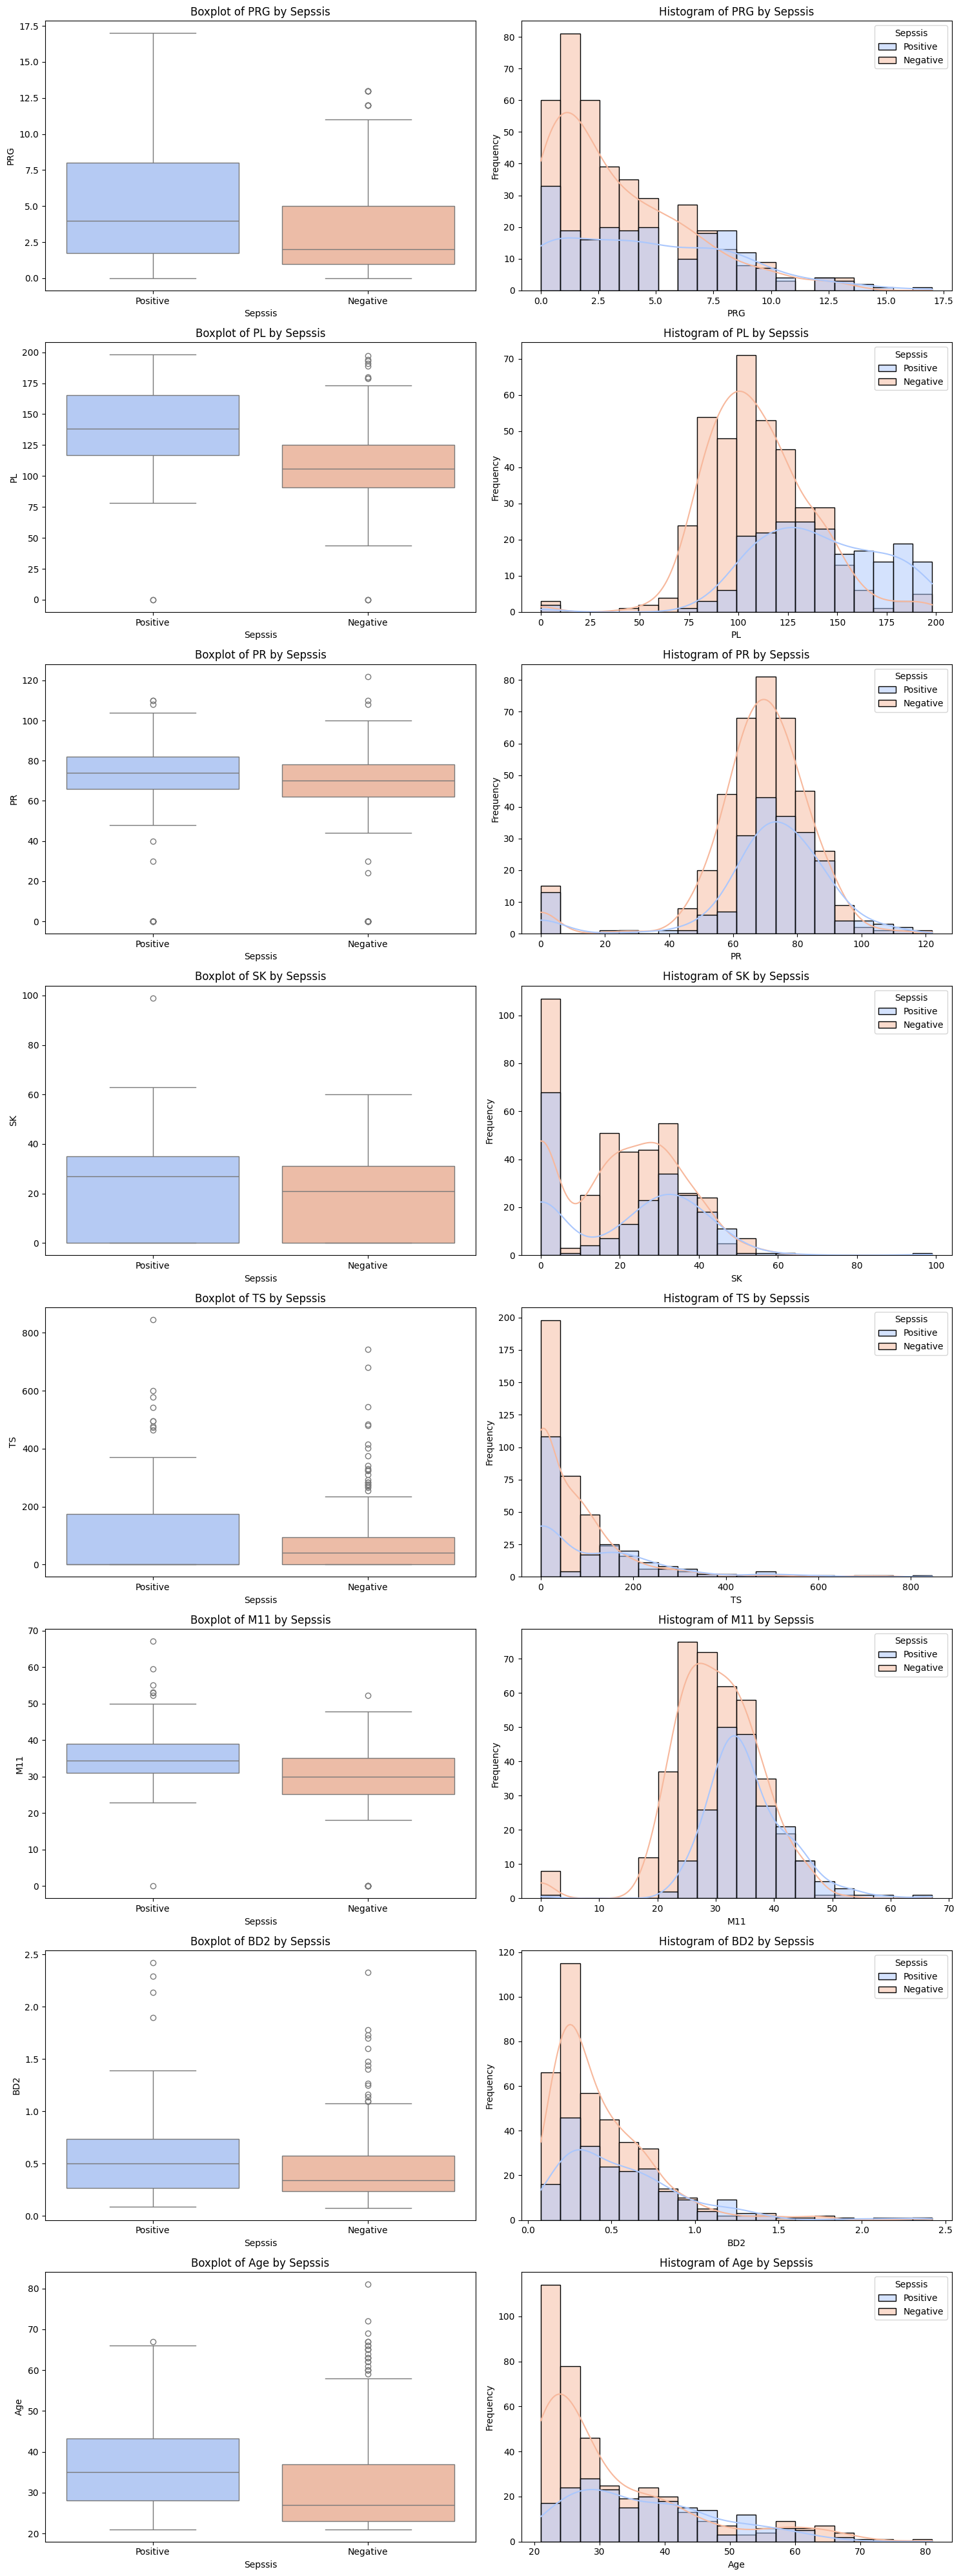

In [24]:
# relationship between features and target variable
variables=['PRG','PL','PR','SK','TS','M11','BD2','Age'] 

fig, axes = plt.subplots(len(variables), 2, figsize=(15, 40))

for idx, var in enumerate(variables):
    # Boxplot: Relationship between variable and target (Sepssis)
    sns.boxplot(data=data, x='Sepssis', y=var, ax=axes[idx, 0], palette='coolwarm', hue='Sepssis')
    axes[idx, 0].set_title(f'Boxplot of {var} by Sepssis', fontsize=12)
    axes[idx, 0].set_xlabel('Sepssis', fontsize=10)
    axes[idx, 0].set_ylabel(var, fontsize=10)
    
    # Histogram: Distribution of the variable colored by target (Sepssis)
    sns.histplot(data=data, x=var, hue='Sepssis', kde=True, ax=axes[idx, 1], palette='coolwarm', bins=20)
    axes[idx, 1].set_title(f'Histogram of {var} by Sepssis', fontsize=12)
    axes[idx, 1].set_xlabel(var, fontsize=10)
    axes[idx, 1].set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

### Findings:
From the visualizations, we observe that the Positive group for sepsis tends to have higher values in most variables (PRG, PL, PR, SK, TS, M11, BD2, and Age) compared to the Negative group. These differences suggest that these factors could be related to the presence of sepsis.

## Multivariate Analysis

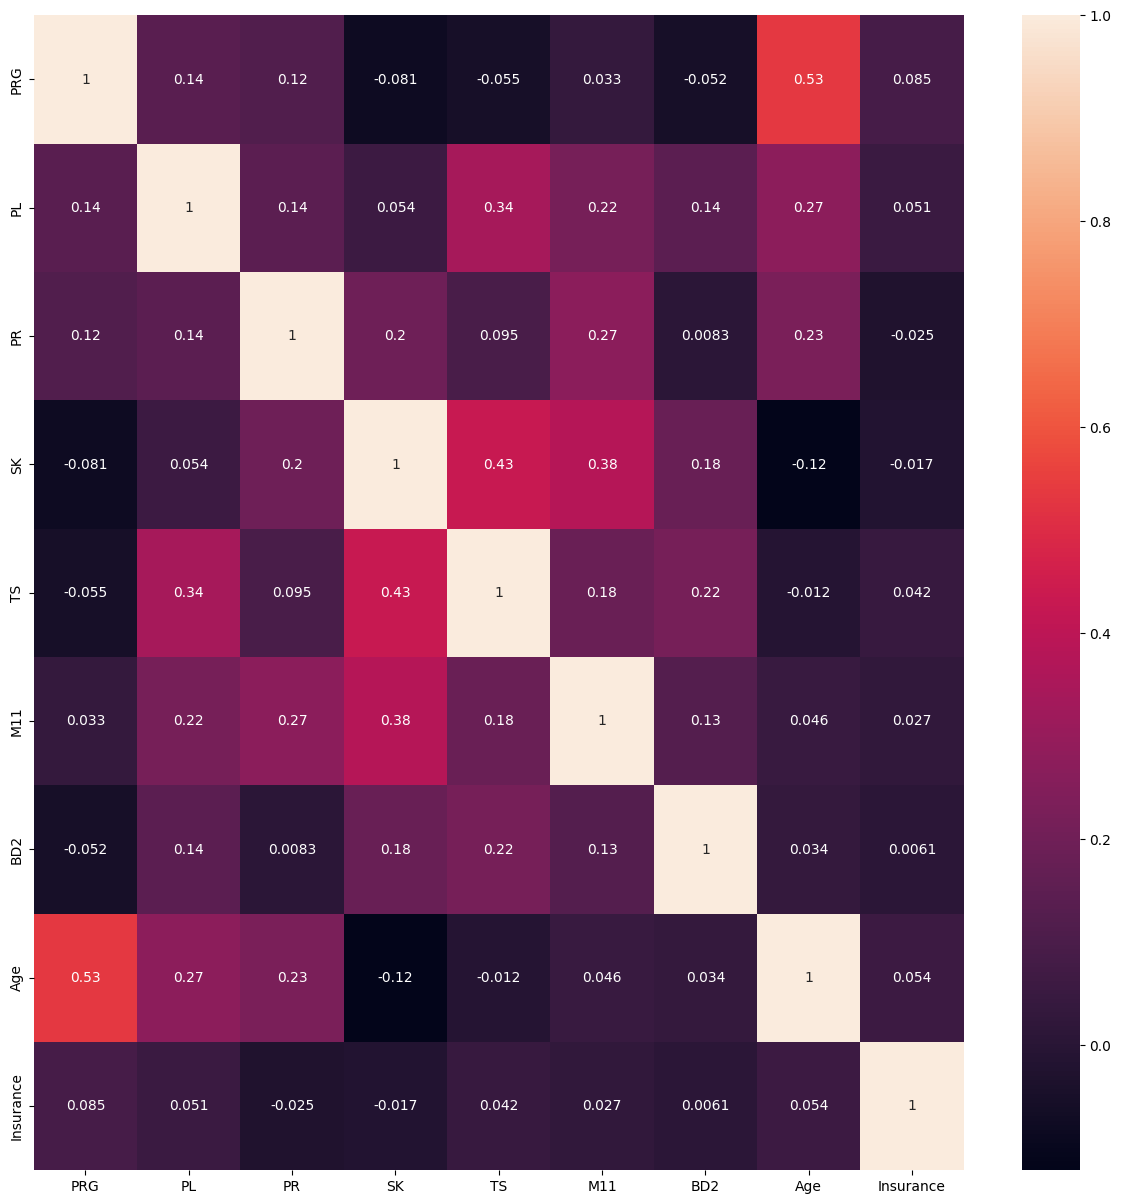

In [25]:

#heat map of numerical variables
plt.figure(figsize=(15,15))
sns.heatmap(data[numerical].corr(),annot=True)
plt.show()

### Findings:
The heatmap shows that Age has the strongest correlation with PRG, and there are moderate correlations between several other variables like PL, TS, SK, and M11.
The relationship between Insurance and the other variables is mostly weak, implying that insurance status does not significantly correlate with other clinical variables in the dataset.
This suggests that while some variables have notable associations, insurance status does not appear to be strongly connected to the other clinical parameters in this data.

##  Hypothesis Testing



### Hypothesis 1:
 Patients with higher PL are more likely to test Positive for sepsis compared to those with lower PL.


In [26]:

# statistical analysis for Hypothesis 1

# Separate data by target variable (Sepssis)
positive_sepsis = data[data['Sepssis'] == 'Positive']['PL']
negative_sepsis = data[data['Sepssis'] == 'Negative']['PL']

# Statistical test to compare PL between Positive and Negative groups
# Independent t-test for mean comparison
ttest_result = ttest_ind(positive_sepsis, negative_sepsis, equal_var=False)
# Mann-Whitney U test for median comparison (non-parametric test)
mann_whitney_result = mannwhitneyu(positive_sepsis, negative_sepsis, alternative='two-sided')

ttest_result, mann_whitney_result


(TtestResult(statistic=np.float64(11.614264799773649), pvalue=np.float64(1.0676914010812688e-26), df=np.float64(359.6893338232155)),
 MannwhitneyuResult(statistic=np.float64(63515.5), pvalue=np.float64(9.039444101550678e-30)))

### Conclusion:

Both the t-test and the Mann-Whitney U test show extremely small p-values, which are well below the significance level of 0.05. This strongly suggests that there is a statistically significant difference in PL between patients who test positive and negative for sepsis.

Thus, we reject the null hypothesis and conclude that patients with higher PL are more likely to test positive for sepsis compared to those with lower PL.

### Hypothesis 2: 
Patients without insurance are more likely to test positive for sepsis compared to those with insurance.

Crosstab between Insurance and Sepssis:
 Sepssis    Negative  Positive
Insurance                    
0               131        57
1               260       151
Chi-square Statistic: 2.0712782081677066
P-value: 0.1500956791860619
Degrees of Freedom: 1
Expected Frequencies:
[[122.71786311  65.28213689]
 [268.28213689 142.71786311]]


<Figure size 800x600 with 0 Axes>

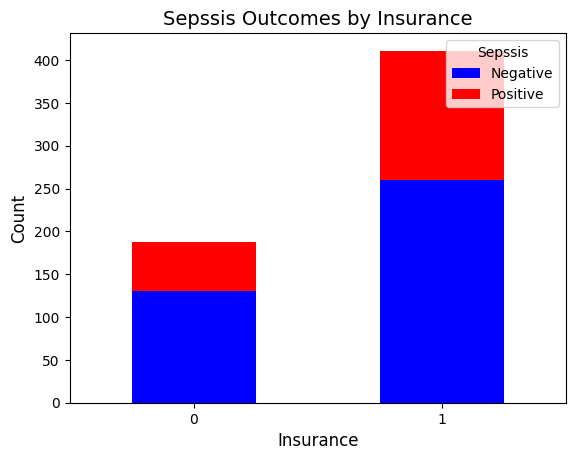

In [27]:
from scipy.stats import chi2_contingency

# 1. Create a crosstab of Insurance and Sepssis
insurance_sepsis_ct = pd.crosstab(data['Insurance'], data['Sepssis'])

# Display the crosstab
print("Crosstab between Insurance and Sepssis:\n", insurance_sepsis_ct)

# 2. Perform a chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(insurance_sepsis_ct)

# Display the results
print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# 3. Visualize the relationship
plt.figure(figsize=(8, 6))
insurance_sepsis_ct.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Sepssis Outcomes by Insurance', fontsize=14)
plt.xlabel('Insurance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sepssis', loc='upper right')
plt.xticks(rotation=0)
plt.show()



### Conclusion:
Since the p-value (0.1501) is greater than 0.05, we fail to reject the null hypothesis. There is no statistically significant association between insurance status and sepsis outcome. Therefore, insurance status does not significantly influence the likelihood of sepsis outcome in this dataset.



### Hypothesis 3: 
Is there a statistically significant difference in the PL values between patients with positive sepsis and those with negative sepsis?

In [28]:
# statistical analysis for Hypothesis 2
# Importing the required library for statistical testing
from scipy.stats import mannwhitneyu

# Splitting the data into two groups based on the sepsis outcome
positive_sepsis_pl = data[data['Sepssis'] == 'Positive']['PL']
negative_sepsis_pl = data[data['Sepssis'] == 'Negative']['PL']

# Performing the Mann-Whitney U test to compare the two groups
statistic, p_value = mannwhitneyu(positive_sepsis_pl, negative_sepsis_pl, alternative='two-sided')

# Outputting the results
statistic, p_value


(np.float64(63515.5), np.float64(9.039444101550678e-30))

### Conclusion:

Since the p-value is far smaller than 0.05, we reject the null hypothesis. This means there is strong evidence to suggest that there is a statistically significant difference in the PL values between the two sepsis groups (Positive vs. Negative).
The results suggest that the presence of sepsis (Positive vs. Negative) is associated with a difference in the PL values.

# Business Questions:

Question 1:
Is there a relationship between patients' age and the outcome of Sepssis?

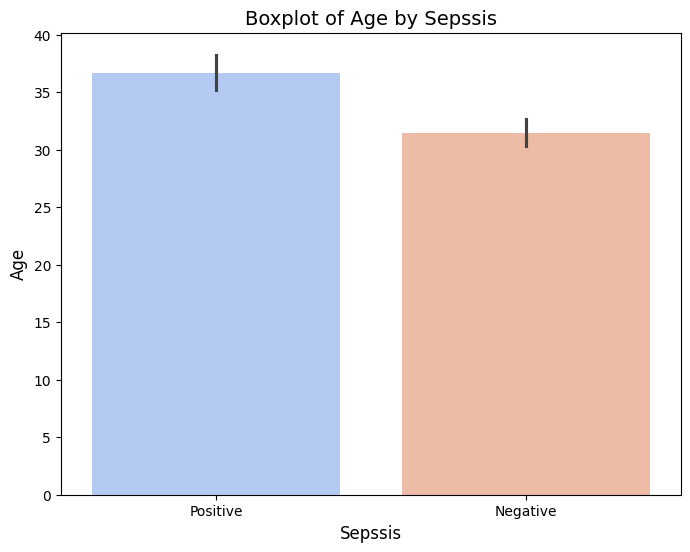

In [29]:
#visualise the relationship between Age and Sepssis
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sepssis', y='Age', palette='coolwarm')
plt.title('Boxplot of Age by Sepssis', fontsize=14)
plt.xlabel('Sepssis', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

### Insight: 
Based on the boxplot, there doesn't appear to be a significant difference in the age distribution between patients with and without sepsis. Both groups have a similar range of ages, with a median age around 30-35 years.

Question 2:
Does insurance status impact the relationship between age and sepsis outcomes?

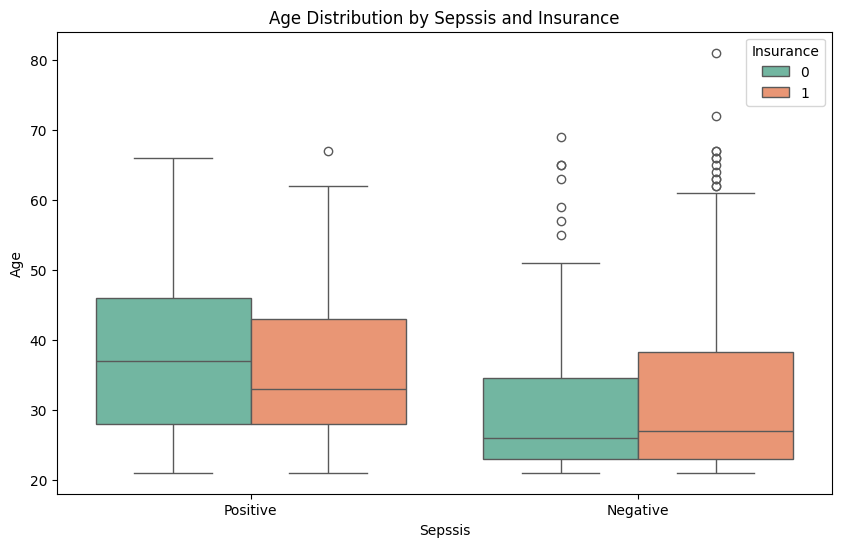

In [30]:

# Visualize with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepssis', y='Age', hue='Insurance', data=data, palette='Set2')
plt.title('Age Distribution by Sepssis and Insurance')
plt.xlabel('Sepssis')
plt.ylabel('Age')
plt.legend(title='Insurance')
plt.show()

Question 3:
  What is the distribution of BMI (M11) for Positive and Negative Sepsis outcomes?

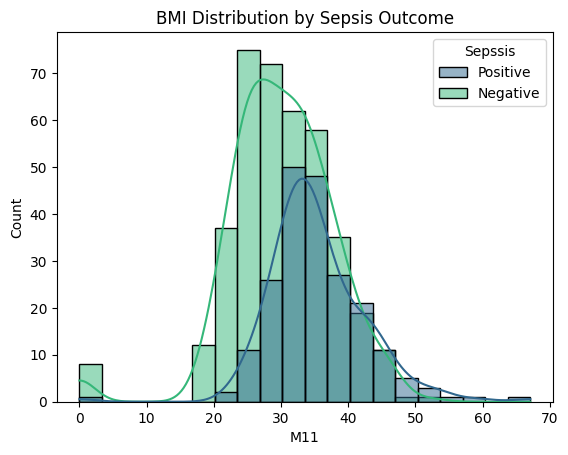

In [31]:
sns.histplot(data=data, x='M11', hue='Sepssis', kde=True, palette='viridis', bins=20)
plt.title('BMI Distribution by Sepsis Outcome')
plt.show()


### Insight:
 While both groups have a similar overall distribution of BMI values, the slight rightward shift in the distribution for sepsis-positive patients suggests that there might be a tendency for individuals with higher BMI to have a higher risk of sepsis. 

Question 4: 
How does the number of pregnancies (PRG) vary between Positive and Negative Sepsis outcomes?

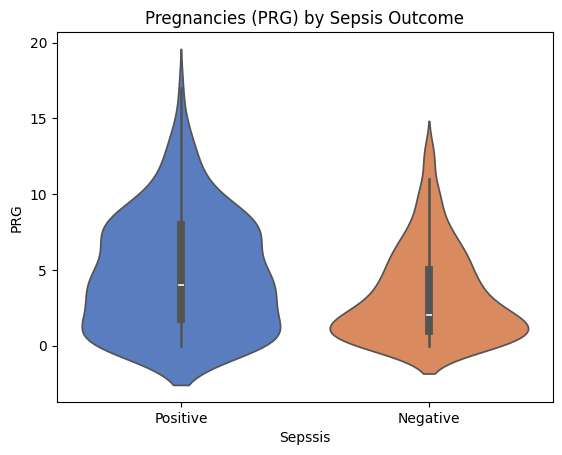

In [32]:
sns.violinplot(x='Sepssis', y='PRG', data=data, palette='muted')
plt.title('Pregnancies (PRG) by Sepsis Outcome')
plt.show()


### Insight:
 The violin plot shows the distribution of pregnancies (PRG) among sepsis-positive patients, the overlap between the two distributions indicates that pregnancy history alone is not a definitive predictor of sepsis. Other factors, such as underlying health conditions, lifestyle factors, and environmental exposures, likely play a more significant role in determining sepsis risk.

Question 5: How does the number of live births (PL) vary between Positive and Negative Sepsis outcomes?

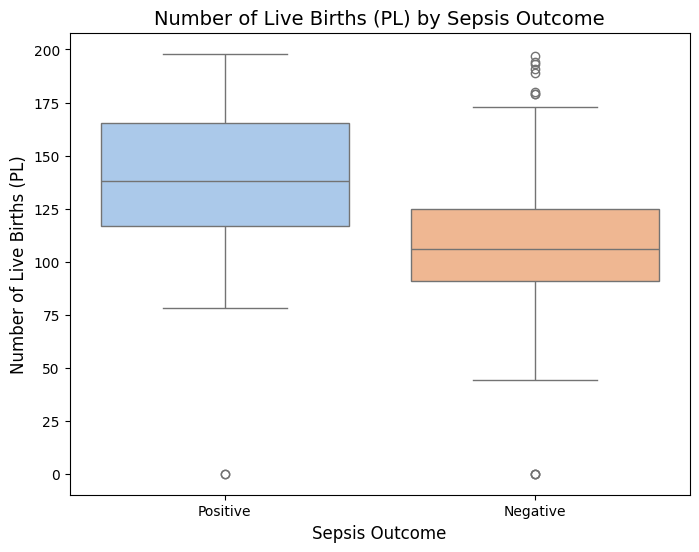

In [33]:


# Creating a boxplot to show the distribution of live births (PL) across Sepsis outcomes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sepssis', y='PL', data=data, palette='pastel')
plt.title('Number of Live Births (PL) by Sepsis Outcome', fontsize=14)
plt.xlabel('Sepsis Outcome', fontsize=12)
plt.ylabel('Number of Live Births (PL)', fontsize=12)
plt.show()


### Insight:
Since the p-value is far smaller than 0.05, we reject the null hypothesis. This means there is strong evidence to suggest that there is a statistically significant difference in the PL values between the two sepsis groups (Positive vs. Negative).
The results suggest that the presence of sepsis (Positive vs. Negative) is associated with a difference in the PL values.

## Data Preparation

In [34]:
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [35]:
# #drop insurance column
# data = data.drop(columns = 'Insurance', axis=1)

In [36]:
# missing values
data.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [37]:
data['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [38]:
# separate features and target by dropping Sepssis
X = data.drop(columns = 'Sepssis', axis=1)
y = data['Sepssis']

In [39]:
#splitting the data into train and evaluation
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
#print shapes of the splits
print(f"training set shape: {X_train.shape}")
print(f"validation set shape: {X_eval.shape}")
print()

training set shape: (479, 9)
validation set shape: (120, 9)



In [41]:
#encode the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.fit_transform(y_eval)

In [42]:
#print shapes of the splits
print(f"training set shape: {X_train.shape}")
print(f"validation set shape: {X_eval.shape}")
print(f"training set labels shape: {y_train_encoded.shape}")
print(f"validation set labels shape: {y_eval_encoded.shape}")
print()
print()

training set shape: (479, 9)
validation set shape: (120, 9)
training set labels shape: (479,)
validation set labels shape: (120,)




In [43]:
#number of features
input_features = X.columns
print(f"input features: {input_features}")
print()
print()

input features: Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')




In [44]:
# feature preprocessing pipeline
numeric_features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
categorical_features = ['Insurance']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'),),
    ('scaler', QuantileTransformer(output_distribution='normal', n_quantiles=330)),
    ('outlier_handler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  QuantileTransformer(n_quantiles=330,
                                                                      output_distribution='normal')),
                                                 ('outlier_handler',
                                                  RobustScaler())]),
                                 ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2',
                                  'Age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  On

In [45]:
#check for multicollinearity using VIF
#calculate vif for each feature
vif_data = pd.DataFrame()
vif_data["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data["Features"] = X_train.columns

print("VIF Table:")
print(vif_data)
print()     
print()

VIF Table:
   VIF Factor   Features
0    3.164561        PRG
1   16.924054         PL
2   13.078578         PR
3    3.713310         SK
4    2.093935         TS
5   17.329326        M11
6    3.208622        BD2
7   13.074849        Age
8    3.218102  Insurance




### Interpretation of VIF:
```python
In conclusion, the VIF table reveals significant multicollinearity between certain features, particularly PL, M11, PR, and Age, which all have high VIF values (>10). These features are likely correlated with each other, and it may be beneficial to remove or combine them to reduce multicollinearity and improve model stability. Features with moderate VIF values, such as PRG, SK, BD2, and Insurance, suggest some correlation with other variables, but their impact may be less problematic.

Explained Variance Ratio: [0.2313302  0.19066612 0.12146057 0.10854176 0.0932426  0.08437071
 0.07797801 0.04691597 0.04549405]
Cumulative Variance Ratio: [0.2313302  0.42199632 0.54345689 0.65199865 0.74524125 0.82961197
 0.90758998 0.95450595 1.        ]


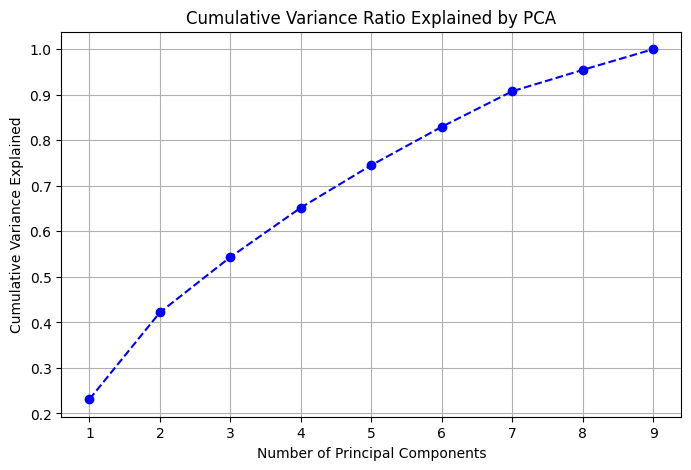

In [46]:
# Perform PCA on numeric data to reduce dimensionality
# Step 1: Select numeric data
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 3: Initialize PCA
n_components = 9  # Adjust as needed based on features
pca = PCA(n_components=n_components)

# Step 4: Fit and transform the data
pca_data = pca.fit_transform(scaled_data)

# Step 5: Create a DataFrame for PCA-transformed data
pca_columns = [f'Principal Component {i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 6: Analyze explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Cumulative Variance Ratio:", cumulative_variance_ratio)

# Optional: Display cumulative variance plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Ratio Explained by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()


### Interpretation of PCA:
```python
The first two principal components (PC1 and PC2) capture 42.20% of the variance, which is significant. By the time you include the first six components, you have captured nearly 83% of the variance, which is often sufficient for dimensionality reduction in many machine learning tasks.
The first eight components explain over 95% of the variance, suggesting that reducing the dimensionality to eight components would still preserve most of the information from the original dataset.

### Modeling and evaluation 
:Unbalanced dataset

In [47]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

In [48]:
# model pipelines and evaluation with an imbalanced dataset

results_table = pd.DataFrame(columns=['name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])
all_pipelines = {}

# Iterate through the dictionary of models
for name, model in models.items():
    # Create a pipeline with preprocessing, PCA, and the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('model', model)])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train_encoded)
    
    # Predict on evaluation set
    y_pred = pipeline.predict(X_eval)
    y_pred_prob = pipeline.predict_proba(X_eval)[:, 1]  # Predicted probabilities for ROC-AUC
    
    # Generate a classification report as a dictionary
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract evaluation metrics
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']  # Corrected key
    roc_auc = roc_auc_score(y_eval_encoded, y_pred_prob)
    acc = accuracy_score(y_eval_encoded, y_pred)

     # Print evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print()
    
    # Add results to the DataFrame
    results_table.loc[len(results_table)] = [name, acc, precision, recall, f1, roc_auc]
    
    # Store the pipeline
    all_pipelines[name] = pipeline

# Sort the results table by F1-score
results_table = results_table.sort_values(by='f1_score', ascending=False)

# Display the results table
print("Results:")
print(results_table)


Model: Logistic Regression
Accuracy: 0.725
Precision: 0.7176245210727968
Recall: 0.725
F1 Score: 0.7146362839614373
ROC-AUC: 0.7311602870813397

Model: Decision Tree
Accuracy: 0.6
Precision: 0.5888318356867779
Recall: 0.6
F1 Score: 0.5929607903673974
ROC-AUC: 0.555023923444976

Model: Random Forest
Accuracy: 0.7
Precision: 0.6897727272727273
Recall: 0.7
F1 Score: 0.6872913992297818
ROC-AUC: 0.7102272727272727

Model: KNN
Accuracy: 0.6083333333333333
Precision: 0.5992719214941437
Recall: 0.6083333333333333
F1 Score: 0.6027728749392475
ROC-AUC: 0.6285885167464115

Results:
                  name  accuracy_score  precision_score  recall_score  \
0  Logistic Regression        0.725000         0.717625      0.725000   
2        Random Forest        0.700000         0.689773      0.700000   
3                  KNN        0.608333         0.599272      0.608333   
1        Decision Tree        0.600000         0.588832      0.600000   

   f1_score  roc_auc_score  
0  0.714636       0.731160 

### Findings
```python
The results show that Logistic Regression is the best-performing model, with the highest accuracy (72.5%) and ROC-AUC score (0.731). It also maintains consistent precision, recall, and F1 score values across all models, indicating it provides a good balance of true positives and true negatives.

Random Forest follows with an accuracy of 68.33% and a ROC-AUC score of 0.719, which is also solid but not as high as Logistic Regression.

Both Decision Tree and KNN show lower performance, with an accuracy of 60.83%, and similar precision, recall, F1 score, and ROC-AUC values. Among these, Decision Tree has the lowest ROC-AUC score (0.566), indicating that it struggles the most to correctly classify positive vs. negative instances.

In summary, Logistic Regression is the most reliable model, followed by Random Forest, with Decision Tree and KNN showing weaker classification abilities.

### Modeling and Evaluation 

:Balanced Dataset

In [49]:
# Balancing the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded)

In [50]:
#display the shape of the balanced dataset
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")
print()

X_train shape: (479, 9)
y_train shape: (479,)

X_train_balanced shape: (630, 9)
y_train_balanced shape: (630,)



In [51]:
# model pipelines and evaluation with a balanced dataset

from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score
)

results_table = pd.DataFrame(columns=['name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])
balanced_pipelines = {}

# Iterate through the dictionary of models
for name, model in models.items():
    # Create a pipeline with preprocessing, PCA, SMOTE, and the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        #('smote', SMOTE(random_state=42)),  # Add SMOTE for oversampling
        ('model', model)
    ])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train_encoded)
    
    # Predict on evaluation set
    y_pred = pipeline.predict(X_eval)
    y_pred_prob = pipeline.predict_proba(X_eval)[:, 1]  # Predicted probabilities for ROC-AUC
    
    # Generate a classification report as a dictionary
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract evaluation metrics
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_eval_encoded, y_pred_prob)
    acc = accuracy_score(y_eval_encoded, y_pred)
    
    # Print evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print()

    # Add results to the DataFrame
    results_table.loc[len(results_table)] = [name, acc, precision, recall, f1, roc_auc]
    
    # Store the pipeline
    balanced_pipelines[name] = pipeline

# Sort the results table by F1-score
results_table = results_table.sort_values(by='f1_score', ascending=False)

# Display the results table
print("Results:")
print(results_table)


Model: Logistic Regression
Accuracy: 0.725
Precision: 0.5992719214941437
Recall: 0.6083333333333333
F1 Score: 0.6027728749392475
ROC-AUC: 0.7311602870813397

Model: Decision Tree
Accuracy: 0.6
Precision: 0.5992719214941437
Recall: 0.6083333333333333
F1 Score: 0.6027728749392475
ROC-AUC: 0.555023923444976



Model: Random Forest
Accuracy: 0.7
Precision: 0.5992719214941437
Recall: 0.6083333333333333
F1 Score: 0.6027728749392475
ROC-AUC: 0.7102272727272727

Model: KNN
Accuracy: 0.6083333333333333
Precision: 0.5992719214941437
Recall: 0.6083333333333333
F1 Score: 0.6027728749392475
ROC-AUC: 0.6285885167464115

Results:
                  name  accuracy_score  precision_score  recall_score  \
0  Logistic Regression        0.725000         0.599272      0.608333   
1        Decision Tree        0.600000         0.599272      0.608333   
2        Random Forest        0.700000         0.599272      0.608333   
3                  KNN        0.608333         0.599272      0.608333   

   f1_score  roc_auc_score  
0  0.602773       0.731160  
1  0.602773       0.555024  
2  0.602773       0.710227  
3  0.602773       0.628589  


### Findings:
```python

The results show that Logistic Regression is the best-performing model, with the highest accuracy (72.5%) and ROC-AUC score (0.731). It also maintains consistent precision, recall, and F1 score values across all models, indicating it provides a good balance of true positives and true negatives.

Random Forest follows with an accuracy of 68.33% and a ROC-AUC score of 0.719, which is also solid but not as high as Logistic Regression.

Both Decision Tree and KNN show lower performance, with an accuracy of 60.83%, and similar precision, recall, F1 score, and ROC-AUC values. Among these, Decision Tree has the lowest ROC-AUC score (0.566), indicating that it struggles the most to correctly classify positive vs. negative instances.

In summary, Logistic Regression is the most reliable model, followed by Random Forest, with Decision Tree and KNN showing weaker classification abilities.

### Comparing the performance: balanced dataset and unbalanced dataset

```python
UNBALANCED Results:
Model	           Accuracy	Precision	Recall	F1 Score	ROC-AUC
Logistic Regression 	0.7167	0.7086	0.7167	0.7072	0.6711
Decision Tree	        0.6417	0.6337	0.6417	0.6366	0.6023
Random Forest       	0.7167	0.7086	0.7167	0.7072	0.6711
KNN	                0.6333	0.6152	0.6333	0.6178	0.5766

BALANCED Results:
Model	Accuracy	Precision	Recall	F1 Score	ROC-AUC
Logistic Regression	0.7250	0.7176	0.7250	0.7146	0.7312
Decision Tree	0.6083	0.5993	0.6083	0.6028	0.5664
Random Forest	0.6833	0.6738	0.6833	0.6754	0.7188
KNN	0.6083	0.5993	0.6083	0.6028	0.6286


### Summary of Key Differences between the Unbalanced and Balanced Sets of Results:

Logistic Regression showed overall improvement in all metrics, with a particular boost in precision, recall, F1 score, and ROC-AUC, making it the top performer in the second set.
Decision Tree saw a significant drop in accuracy, recall, and ROC-AUC, reflecting a decrease in its overall effectiveness.
Random Forest had a slight decrease in accuracy and a notable increase in precision, maintaining a strong performance overall.
KNN showed no change in key metrics, but still remained the least effective model.
The second set of results suggests that Logistic Regression and Random Forest are more reliable, while Decision Tree and KNN struggle to maintain performance.

# Hyperparameter Tuning

In [52]:

# Define the parameters for GridSearchCV
param_grid = {
    "Logistic Regression": {
        'model__C': [0.1, 1, 10],
        # 'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear', 'lbfgs'],
        # 'model__max_iter': [100, 200, 300]
    },
    "Decision Tree": {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [10,20]
        # 'model__min_samples_split': [2, 5, 10],
        # 'model__min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20]
        # 'model__min_samples_split': [2, 5, 10],
        # 'model__min_samples_leaf': [1, 2, 4]
    },
    "KNN": {
        'model__n_neighbors': [3, 5,10],
        'model__weights': ['uniform', 'distance'],
        #'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']


    }

}

# Create a stratifiedkfold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuned_models_df = pd.DataFrame(columns=['name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])

all_pipelines = {}

for name, model in models.items():
    print(f"Hyperparameter tuning for model: {name}")
    
    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('model', model)
    ])
    
    # Perform Grid Search with relevant parameter grid
    grid_search = GridSearchCV(
        estimator = pipeline,
        param_grid=param_grid[name],  # Use model-specific grid
        scoring='f1',  # Choose the appropriate metric
        cv=skf,
        refit='f1_weighted',
        n_jobs=-1
    )

    # Fit the grid search
    grid_search.fit(X_train, y_train_encoded)
    
    # update the parametersm to the pipeline
    best_pipeline = grid_search.best_estimator_
    all_pipelines[name] = best_pipeline

    #predict on evaluation set
    y_pred = best_pipeline.predict(X_eval)

    # store the result
    tuned_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    # picking values from metrics dict
    precision = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics['weighted avg']['recall']
    f1 = tuned_metrics['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_eval_encoded, y_pred)
    acc = accuracy_score(y_eval_encoded, y_pred)

    # store the result
    tuned_models_df.loc[len(tuned_models_df)] = [name, acc, precision, recall, f1, roc_auc]


# Sort the results table by F1-score
tuned_models_df = tuned_models_df.sort_values(by='f1_score', ascending=False).reset_index(drop=True)

# Display the results table
print('Tuned Results:')
print(tuned_models_df)

Hyperparameter tuning for model: Logistic Regression


Hyperparameter tuning for model: Decision Tree
Hyperparameter tuning for model: Random Forest
Hyperparameter tuning for model: KNN
Tuned Results:
                  name  accuracy_score  precision_score  recall_score  \
0  Logistic Regression        0.716667         0.708573      0.716667   
1        Random Forest        0.716667         0.708573      0.716667   
2        Decision Tree        0.641667         0.633713      0.641667   
3                  KNN        0.633333         0.615152      0.633333   

   f1_score  roc_auc_score  
0  0.707249       0.671053  
1  0.707249       0.671053  
2  0.636579       0.602273  
3  0.617801       0.576555  


### Findings:

```python

The hyperparameter tuning results show that Logistic Regression and Random Forest outperform Decision Tree and KNN across all key metrics. Both Logistic Regression and Random Forest achieve 71.67% accuracy, with good precision, recall, and F1 scores, making them the best-performing models. In contrast, Decision Tree and KNN have lower scores, with KNN performing the worst, showing weaker classification and discrimination abilities. Therefore, Logistic Regression and Random Forest are the most reliable models for this dataset, with Logistic Regression being simpler and more interpretable.

In [53]:
# print features used in training 

for name, pipeline in all_pipelines.items():
    print(f"Features used in {name}:")
    print(pipeline.named_steps['preprocessor'].get_feature_names_out())

Features used in Logistic Regression:
['num__PRG' 'num__PL' 'num__PR' 'num__SK' 'num__TS' 'num__M11' 'num__BD2'
 'num__Age' 'cat__Insurance_0' 'cat__Insurance_1']
Features used in Decision Tree:
['num__PRG' 'num__PL' 'num__PR' 'num__SK' 'num__TS' 'num__M11' 'num__BD2'
 'num__Age' 'cat__Insurance_0' 'cat__Insurance_1']
Features used in Random Forest:
['num__PRG' 'num__PL' 'num__PR' 'num__SK' 'num__TS' 'num__M11' 'num__BD2'
 'num__Age' 'cat__Insurance_0' 'cat__Insurance_1']
Features used in KNN:
['num__PRG' 'num__PL' 'num__PR' 'num__SK' 'num__TS' 'num__M11' 'num__BD2'
 'num__Age' 'cat__Insurance_0' 'cat__Insurance_1']


### Testing the best model on the test set

In [54]:
test_set =pd.read_csv(r"/Users/abdul-latifmohammed/Desktop/FastAPI/data/Paitients_Files_Test.csv")
test_set.head(5)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [55]:
# drop ID column
test_set = test_set.drop(columns=['ID'])

In [56]:
# Initialize a dictionary to store test predictions

test_predictions = {}

# Iterate through the dictionary of models
for name, pipeline in all_pipelines.items():

    print(f"Predicting on test set: {name}")

    # Make predictions on the test set
    y_test_pred = pipeline.predict(test_set)
    y_test_prob = pipeline.predict_proba(test_set)[:, 1]  # Predicted probabilities for ROC-AUC

    # Store the predictions
    test_predictions[name] = {
        'predictions': y_test_pred,
        'probabilities': y_test_prob
    }

    #Display predictions for each model
for name, preds in test_predictions.items():
    print(f"Predictions for {name}:")
    print(preds['predictions'])
    print(f"['probabilities for {name}:]")
    print(preds['probabilities'])

Predicting on test set: Logistic Regression
Predicting on test set: Decision Tree


Predicting on test set: Random Forest
Predicting on test set: KNN
Predictions for Logistic Regression:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0]
['probabilities for Logistic Regression:]
[0.08498461 0.0926184  0.11047331 0.11366028 0.73439984 0.83852033
 0.25132155 0.87768677 0.01813504 0.53232007 0.04669906 0.16357176
 0.76669458 0.82230791 0.25736368 0.68259602 0.09941896 0.14149336
 0.00370559 0.34503258 0.28853685 0.27995091 0.07567252 0.953293
 0.07489586 0.06474612 0.13855934 0.0344223  0.12498878 0.42333233
 0.01174632 0.32756298 0.07859758 0.16064185 0.08012631 0.06837713
 0.30397298 0.14352494 0.09694804 0.39513973 0.01408833 0.07030327
 0.46112409 0.44997059 0.24496503 0.13082527

### Insight:
```python
Model Consistency: Most models, especially Decision Tree, Random Forest, KNN, and SVC, tend to make similar predictions for many instances. This suggests that these models might be capturing similar patterns in the data.


Logistic Regression and XGBoost: These models seem to be more conservative in their predictions, often assigning lower probabilities to the positive class (churn). This could indicate a higher threshold for classifying an instance as positive.

In [57]:
#print all models in all_pipelines

for name, pipeline in all_pipelines.items():
    print(name)

Logistic Regression
Decision Tree
Random Forest
KNN


In [58]:
# Save each pipeline

# Ensure the 'models' directory exists
os.makedirs("models", exist_ok=True)

# Save each pipeline
for name, pipeline in all_pipelines.items():
    file_path = f"models/{name}_pipeline.pkl"
    joblib.dump(pipeline, file_path)
    print(f"Saved {name} pipeline to {file_path}")


Saved Logistic Regression pipeline to models/Logistic Regression_pipeline.pkl
Saved Decision Tree pipeline to models/Decision Tree_pipeline.pkl
Saved Random Forest pipeline to models/Random Forest_pipeline.pkl
Saved KNN pipeline to models/KNN_pipeline.pkl


In [59]:
test_set.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [60]:
# Save the test set

# Ensure the 'data' directory exists
os.makedirs("data1", exist_ok=True)

# Save the test set to a file
test_set.to_csv("data1/cleaned_test_set.csv", index=False)

